# **Model Measurement Analysis**

# **Using any dataset and any classifier do the following:**

**a)** Calculate TP, TN, FP and FN from sklearn library functions

**b)** Calculate different metrics (Accuracy, Precision, Recall(Sensitivity), F1-Score, MCC, Specificity, Negative Predictive Value) by defining our own functions

**c)** Get the sklearn metrics of these values

**d)** Verify them by comparing with scikit-learn's library functions.

**e)** Get the result of Confusion Matrix using sklearn

**f)** Using sklearn, plot the ROC Curve of the probability values in our test data

**g)** Using sklearn, plot the ROC Curve of random probabilities

**h)** Calculate the AUC of our test data using sklearn

**i)** Calculate the AUC of random probabilities using sklearn

**j)** Interpret the results. Write the inference/analysis of each output. 

https://colab.research.google.com/drive/1Cgr6NyxTH0sH3Z8BHRIRFEgXrznD7_Qd?usp=sharing

In [210]:
import numpy as np
import matplotlib.pyplot as plt

# **Dataset**
Breast Cancer Dataset provided by sckit-learn in dataset module is used. 
*   Desscribe. this dataset
*   Analyze it



In [211]:
# In Python machine learning programming, we have software called scikit-learn. This software contains some small datasets that are very easy to access, one of which is the load_breast_cancer dataset.
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
# print(data.DESCR[:760])  # print short description

# **Analysis of the Dataset**
*   There are 569 instances 
*   Each instance has 30 attributes 

# **What are the targets classes i.e. types of cancer.?**
Target Attribute Values are - **['malignant' 'benign']**

This dataset is used for binary classification between two types of cancer("Malignant" and "Benign").

We will consider benign as positive class, and malignant as negative class. Therefore, 
*   **0 for is_not_benign(malignant)**
*   **1 for is_benign**

In [212]:
print(f"Types of cancer (targets) are {data.target_names}")
X = data.data  # features
y = data.target  # labels
print(f"Shape of features is {X.shape}, and shape of target is {y.shape}")
# print("Targets are: ", y)

Types of cancer (targets) are ['malignant' 'benign']
Shape of features is (569, 30), and shape of target is (569,)


# **Split the data**
Since we shouldn't train and test our model with the same dataset, it is always a good idea to split the data in three parts - train data, test data, and validation data.

We won't require validation data here. 
We split the dataset into training and testing data
*   200 examples for testing. Code : test_size=200 
*   Rest, 369 examples for training

In [213]:
from sklearn.model_selection import train_test_split
# test_size :- int represents the absolute number of test samples.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=0)
# printing the value of y_train from begining till 10 index[excluding 10th index]
print(y_train[:10])

[1 1 0 0 0 1 1 1 0 1]


# **Analysis of Code:**

**Classifier Used:** scikit's Support Vector Machines classifier for prediction. That is: sklearn.svm.



In [214]:
# kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’ :- Specifies the kernel type to be used in the algorithm. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

# probability bool, default=False :- Whether to enable probability estimates. This must be enabled prior to calling fit, will slow down that method as it internally uses 5-fold cross-validation, and predict_proba may be inconsistent with predict.

# What does SVM SVC do?
# The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data.

from sklearn.svm import SVC
classifier = SVC(kernel='linear', probability=True, verbose=True)

# **Analysis of Code:**
*   fit/train the model on our training dataset.
*   It trains quite fast since we are working with relatively small dataset.

In [215]:
classifier.fit(X_train, y_train)

[LibSVM]

SVC(kernel='linear', probability=True, verbose=True)

# **Analysis of Code &. Output**
*   Save the prediction results both as ***probability*** and as ***classes***.
*   **y_preds** is a *1D vector* of one of {0, 1} values, denoting predictions as malignant and benign, respectively.
*   **y_test** is a 1D vector of one of (0,1) values of the 200 samples of test data 
*   **y_proba** is a *2D vector*, where for each example, it contains a vector of length 2,[prob. of malignant, prob. of benign]

In [216]:
# Python predict() function enables us to predict the labels of the data values on the basis of the trained model.
# The predict() function accepts only a single argument which is usually the data to be tested.
# It returns the labels of the data passed as argument based upon the learned or trained data obtained from the model.
# Thus, the predict() function works on top of the trained model and makes use of the learned label to map and predict the labels for the data to be tested.
y_preds = classifier.predict(X_test)  

# predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form.
y_proba = classifier.predict_proba(X_test) 
print("Prediction as class - malignanat or benign ", y_preds[:5])
print("Test Data are: ", y_test[:5])
print("Probability of malignant & probability of benign. ", y_proba[:5])

Prediction as class - malignanat or benign  [0 1 1 1 1]
Test Data are:  [0 1 1 1 1]
Probability of malignant & probability of benign.  [[9.47841240e-01 5.21587597e-02]
 [8.17697286e-02 9.18230271e-01]
 [1.23569853e-02 9.87643015e-01]
 [1.76891994e-01 8.23108006e-01]
 [9.28816272e-06 9.99990712e-01]]


# **y_proba** is reshaped into a 1D vector denoting the probability of having benign cancer.

In [217]:
# # print(y_proba)   # here it is in 2d form
# y_proba = y_proba[:, 1].reshape((y_proba.shape[0],))
# print("2D to 1D reshaped Probability of benign. ", y_proba[:5])

# **Analysis of Code &. Output**


In the binary case, we can extract TN, FP, FN, TP as follows:

>***tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()***

>***(tn, fp, fn, tp) = (0, 2, 1, 1)***

**Confusion Matrix**
*   Calculate confusion matrix of the predictions
*   Implemented in Scikit-learn's sklearn.metrics.confusion_matrix.

In [218]:
# y_true:- array-like of shape (n_samples,) :- Ground truth (correct) target values.
# y_pred :- array-like of shape (n_samples,) :- Estimated targets as returned by a classifier.
# labels :- array-like of shape (n_classes), default=None :- List of labels to index the matrix. This may be used to reorder or select a subset of labels.
# The numpy.ravel() functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it). A copy is made only if needed.
from sklearn.metrics import confusion_matrix
TN, FP, FN, TP = confusion_matrix(list(y_test), list(y_preds), labels=[0, 1]).ravel()
print("True Negatives", TN)
print("True Positives", TP)
print("False Positives", FP)
print("False Negatives", FN)

# Dont miss this declaration. Later used to calculate diferent metrics used for checking whether it is a good model or not.
results = {}  

# Note to change the labels from the default 0,1 to 1,0
# Basically by making the label=[1,0]
# we are making the confusion matrix as(the way we are used to solve in theory clasess)
# TP  FN
# FP  TN

# we will use the varible while plotting the confusion matrix hanece store it in some variable
conf = confusion_matrix(y_test, y_preds, labels=[1, 0])
print("Confusion Matrix we want is: \n", conf)


True Negatives 70
True Positives 124
False Positives 3
False Negatives 3
Confusion Matrix we want is: 
 [[124   3]
 [  3  70]]


# **PLOTTING THE CONFUSION MATRIX**

Text(0.5, 1.0, 'Confusion Matrix')

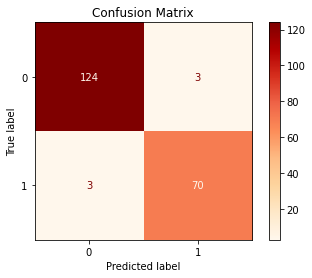

In [219]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot(cmap=plt.cm.OrRd)
plt.title("Confusion Matrix")

# **Different metrics that are used to evaluate the model** 
 >**Calculate Accuracy** :- number of examples correctly predicted / total number of examples

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/c72ec21ef2505c2d376e96197637fc64f75e5891)

> **Calculate Sensitivity or Recall or True Positive Rate(TPR)** :- number of samples actually and predicted as  `Positive` / total number of samples actually `Positive`  

  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/64d5540cbadeb83f864d7a731b7ab43cccd0f353)

> **Calculate Specificity/True Negative Rate(TNR)** :- number of samples actually and predicted as  `Negative` / total number of samples actually  `Negative`  
 
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/aac65b6586cb61c1268403895012c2a8f19b0c5e)

> **Calculate Precision/Positive Predictive Value(PPV)** :- number of samples actually and predicted as  `Positive` / total number of samples predicted as `Positive`  

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/699fcdb880b7f6a92742bc0845b8b60b59806a98)

> **Calculate Negative Predictive Value(NPV)** :- number of samples actually and predicted as  `Negative` / total number of samples predicted as `Negative` 
   
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/b6da0f59faffbc1704974e97847ab4fa599f5521)

> **F1-Score** :- Harmonic Mean of Precision and Recall.  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5663ca95d471868169c4e4ea57c936f1b6f4a588)

> **Matthew's correlation coefficient(MCC)**
MCC = (TP*TN – FP*FN) / √(TP+FP)(TP+FN)(TN+FP)(TN+FN)

Matthew's coefficient range between `[-1, 1]`. `0` usually means totally random predictions. `1` means a perfect classifier, while a negative value (`[-1, 0)`) suggests a negative correlation between predictions and actual values.   
Here' the formual for MCC  
![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/5caa90fc15105b74b59a30bbc9cc2e5bd43a13b7)


In [220]:
metric = "Accuracy"
results[metric] = (TP + TN) / (TP + TN + FP + FN)
print(f"Accuracy is {results[metric]: .3f}") 

metric = "Recall"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

metric = "Sensitivity"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

metric = "True Positive Rate"
results[metric] = TP / (TP + FN)
print(f"{metric} is {results[metric]: .3f}")

metric = "False Negative Rate"
results[metric] = TN / (TN + FP)
print(f"{metric} is {results[metric]: .3f}")

metric = "Precision"
results[metric] = TP / (TP + FP)
print(f"{metric} is {results[metric]: .3f}")

# Not in the syllabus
metric = "NPV"
results[metric] = TN / (TN + FN)
print(f"{metric} is {results[metric]: .3f}")

metric = "F1 score"
results[metric] = 2 / (1 / results["Precision"] + 1 / results["Recall"])
print(f"{metric} is {results[metric]: .3f}")

metric = "MCC"
num = TP * TN - FP * FN
den = np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
results[metric] = num / den
print(f"{metric} is {results[metric]: .3f}")

Accuracy is  0.970
Recall is  0.976
Sensitivity is  0.976
True Positive Rate is  0.976
False Negative Rate is  0.959
Precision is  0.976
NPV is  0.959
F1 score is  0.976
MCC is  0.935


#**Comparing these calculated metrics with scikit-learn**

**Analysis**: These values match with the values calculated from `scikit-learn`'s functions.


In [221]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

print(f"Calculated and scikit-learn Accuracy:                          {results['Accuracy']: .3f}, {accuracy_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Precision score:                   {results['Precision']: .3f}, {precision_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Recall score:                      {results['Recall']: .3f}, {recall_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn F1 score:                          {results['F1 score']: .3f}, {f1_score(y_test, y_preds): .3f}")
print(f"Calculated and scikit-learn Matthew's correlation coefficient: {results['MCC']: .3f}, {matthews_corrcoef(y_test, y_preds): .3f}")

Calculated and scikit-learn Accuracy:                           0.970,  0.970
Calculated and scikit-learn Precision score:                    0.976,  0.976
Calculated and scikit-learn Recall score:                       0.976,  0.976
Calculated and scikit-learn F1 score:                           0.976,  0.976
Calculated and scikit-learn Matthew's correlation coefficient:  0.935,  0.935


# **ROC curve (Receiver Operating Characteristic curve)**

A receiver operating characteristic curve, i.e. ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

The ROC curve is created by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) ***at various threshold settings.***

**Analysis**: The above is the ROC curve for the Breast Cancer Dataset.

1. The peak towards left-most corner means near perfect classifier

2. Random prediction will have the curve as the blue dotted straight line.

3. This ROC curve tells us that our model is nearly perfect classifier, with high accuracy!

# **AUC: Area under the Curve**

It is the area under the ROC curve formed by the predictions.

A totally random prediction will have AUC score 0.5, while a perfect classifier will have AUC score of 1.

Our Result is 0.9872 which indicates a good classifier!

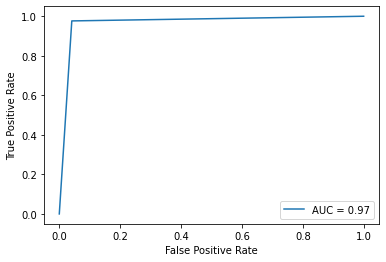

In [222]:
from sklearn.metrics import RocCurveDisplay , auc , roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()